In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('data/qualifying.csv')
merged = pd.read_csv('data/merged.csv')

In [20]:
s20 = data.query('season == 2020')

d = s20['qual_time'].describe()
print(f"Min: { d['min'] } Max: {d['max']}")

Min: 53.377 Max: 141.611


In [26]:
s20.query('qual_time >= 100')

,grid,driver,constructor,season,round,qual_time,q_delta
119,1,Lewis Hamilton HAM,Mercedes,2020,7,101.252,0.000
120,2,Valtteri Bottas BOT,Mercedes,2020,7,101.763,0.511
121,3,Max Verstappen VER,Red Bull Racing Honda,2020,7,101.778,0.526
122,4,Daniel Ricciardo RIC,Renault,2020,7,102.061,0.809
123,5,Alexander Albon ALB,Red Bull Racing Honda,2020,7,102.264,1.012
124,6,Esteban Ocon OCO,Renault,2020,7,102.396,1.144
125,7,Carlos Sainz SAI,McLaren Renault,2020,7,102.438,1.186
126,8,Sergio Perez PER,Racing Point BWT Mercedes,2020,7,102.532,1.280
127,9,Lance Stroll STR,Racing Point BWT Mercedes,2020,7,102.603,1.351
128,10,Lando Norris NOR,McLaren Renault,2020,7,102.657,1.405


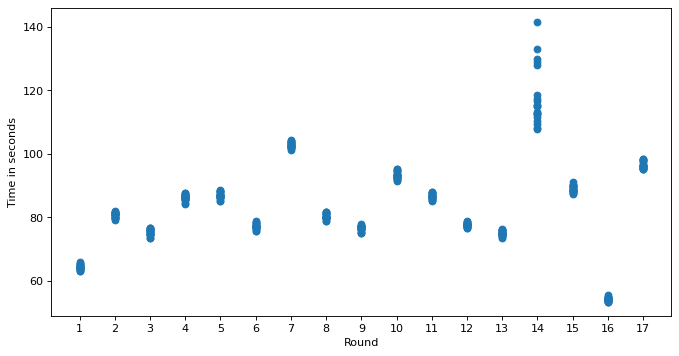

In [3]:
s20 = data.query('season == 2020')
q_times_by_round = s20.groupby('round').agg('qual_time')

x = s20['round'].values
y = s20['qual_time'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(x))
axs.scatter(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encount

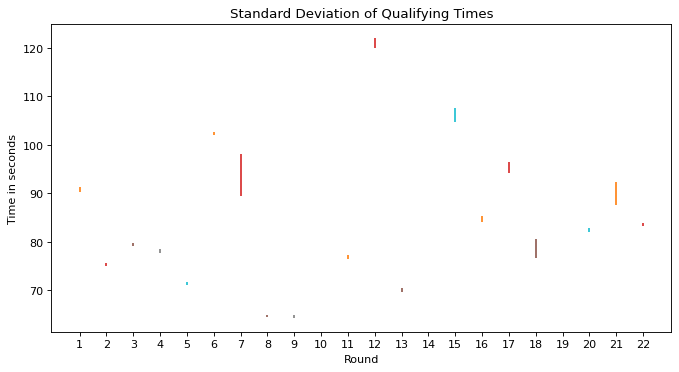

In [18]:
s21 = data.query('season == 2021')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Times')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))

for i in range(1, len(np.unique(s21['round'])) + 1):
    r = s21.query('round == @i & qual_time.notnull()')['qual_time'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

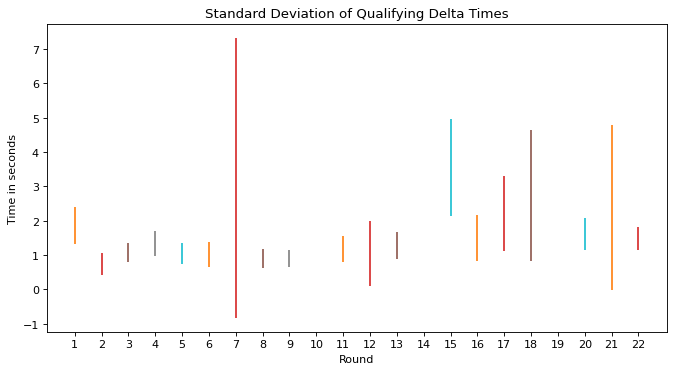

In [46]:
s21 = data.query('season == 2021')

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Delta Times')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))

for i in range(1, len(np.unique(s21['round']))+1):
    r = s21.query('round == @i & q_delta.notnull()')['q_delta'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

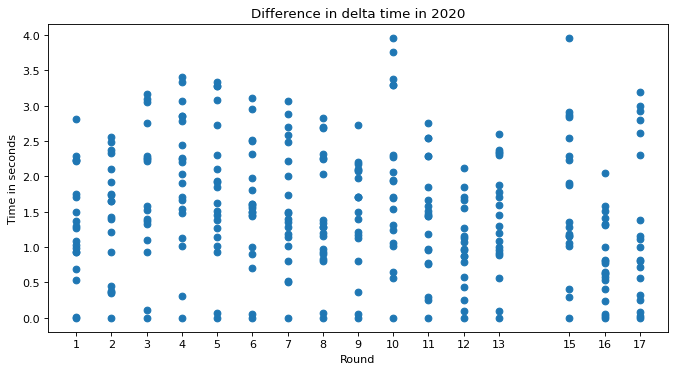

In [29]:
### All rounds in 2020 apart from 14 to show the difference between the front runners
### and the bottom of the pack.
s21 = merged.query('season == 2020 & q_delta.notnull() & round != 14')

x = s21['round'].values
y = s21['q_delta'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Difference in delta time in 2020')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))
axs.scatter(x, y)

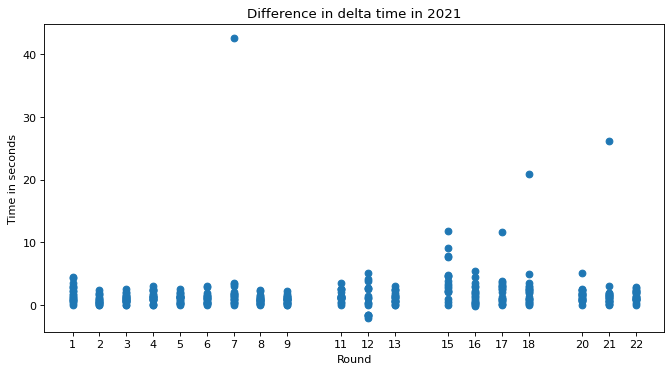

In [37]:
s21 = merged.query('season == 2021 & q_delta.notnull()')
#  & round not in [7, 15, 17, 18, 21]
x = s21['round'].values
y = s21['q_delta'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Difference in delta time in 2021')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))
axs.scatter(x, y)

In [17]:
### Pole conversion rate

pole_sitters = merged.query('grid == 1')

pole_winners = pole_sitters.query('podium == 1')
pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
print(f'Pole conversion: {pole_conversion}%')

Pole conversion: 58.3%
